In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
# import seaborn as sns
# Import statsmodel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import glob as glob
# import arrow
import matplotlib
matplotlib.style.use('ggplot')

In [3]:
import matplotlib as mpl
mpl.rcParams['axes.grid'] = True

In [4]:
dengues = glob.glob("temp/*.csv")
dengues = dengues[:-2]

In [5]:
list_ = []
for file_ in dengues:
    df = pd.read_csv(file_)
    list_.append(df)
    allDengue = np.concatenate(list_)

/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity

In [6]:
allDengue_copy = allDengue.copy()
allDengue_copy[:,9] = allDengue_copy[:,9].astype('str')

In [7]:
def seperate(data,distinct):
    tmp = []
    for distinct_province in distinct:
        sub_tmp = []
        for data_province in data:
            if data_province[9][:2] == distinct_province:
                sub_tmp.append(data_province)
        sub_tmp = np.array(sub_tmp)
        tmp.append(sub_tmp)
    return np.array(tmp)

In [8]:
unique_province = [
                   '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
                   '21', '22', '23', '24', '25', '26', '27', '30', '31', '32', '33',
                   '34', '35', '36', '37', '39', '40', '41', '42', '43', '44', '45',
                   '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
                   '57', '58', '60', '61', '62', '63', '64', '65', '66', '67', '70',
                   '71', '72', '73', '74', '75', '76', '77', '80', '81', '82', '83',
                   '84', '85', '86', '90', '91', '92', '93', '94', '95', '96'
                  ]
allProvinces = seperate(allDengue_copy,unique_province)

In [9]:
allProvinces_copy = allProvinces.copy()
allProvinces_copy = allProvinces_copy[:-1]

# temp = allProvinces_copy[0]
# for i in allProvinces_copy[:3]:
    
allProvinces_copy = np.concatenate(([i for i in allProvinces_copy[:]]),axis=0)

In [17]:
allProvinces_df = pd.DataFrame(allProvinces_copy)
allProvinces_df = allProvinces_df.drop([1,2,3,4,5,6,7,8,9,10,11,12,13,16,17,18,19,20],axis=1)
allProvinces_df.columns = ['โรค', 'รหัสจังหวัด', 'date']
allProvinces_df['รหัสจังหวัด'] = allProvinces_df['รหัสจังหวัด'].astype('str').str[:2]
allProvinces_df = allProvinces_df.sort_values(by='date')
allProvinces_df = allProvinces_df.drop(138990)
allProvinces_df = allProvinces_df.drop(168347)

In [18]:
allProvinces_df.head()

,โรค,รหัสจังหวัด,date
993666,26,95,2003-01-01
130450,26,11,2003-01-01
667297,66,60,2003-01-01
130478,26,11,2003-01-01
397,26,10,2003-01-01


In [19]:
import pickle
with open('/Users/JohnnyV/Desktop/Academic/CS/DataMining/project-trial/thailand.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [20]:
allProvinces_df = allProvinces_df[allProvinces_df['รหัสจังหวัด']!='na']
provinces = ([b.get(int(i)) for i in allProvinces_df['รหัสจังหวัด']])
allProvinces_df['จังหวัด'] = provinces

In [21]:
date_df = allProvinces_df.copy()

In [16]:
date_df.date

168347    0000-00-00
993666    2003-01-01
130450    2003-01-01
667297    2003-01-01
130478    2003-01-01
397       2003-01-01
828385    2003-01-01
932830    2003-01-01
982544    2003-01-01
732031    2003-01-01
666511    2003-01-01
932754    2003-01-01
666509    2003-01-01
468245    2003-01-01
5543      2003-01-01
778304    2003-01-01
5434      2003-01-01
756760    2003-01-01
2502      2003-01-01
831820    2003-01-01
993741    2003-01-01
353894    2003-01-01
972836    2003-01-01
2446      2003-01-01
972851    2003-01-01
907274    2003-01-01
425       2003-01-01
375407    2003-01-01
932427    2003-01-01
932429    2003-01-01
             ...    
828339    2015-12-31
993275    2015-12-31
993274    2015-12-31
981961    2015-12-31
981962    2015-12-31
374373    2015-12-31
982313    2015-12-31
352469    2015-12-31
616774    2015-12-31
631751    2015-12-31
965818    2015-12-31
274295    2015-12-31
274296    2015-12-31
278422    2015-12-31
279110    2015-12-31
687645    2015-12-31
292089    201

In [22]:
date_df.date = pd.DatetimeIndex(date_df.date)
# allProvinces_date_df.index = pd.PeriodIndex(date_df.date,freq='M')
date_df.index = date_df.date

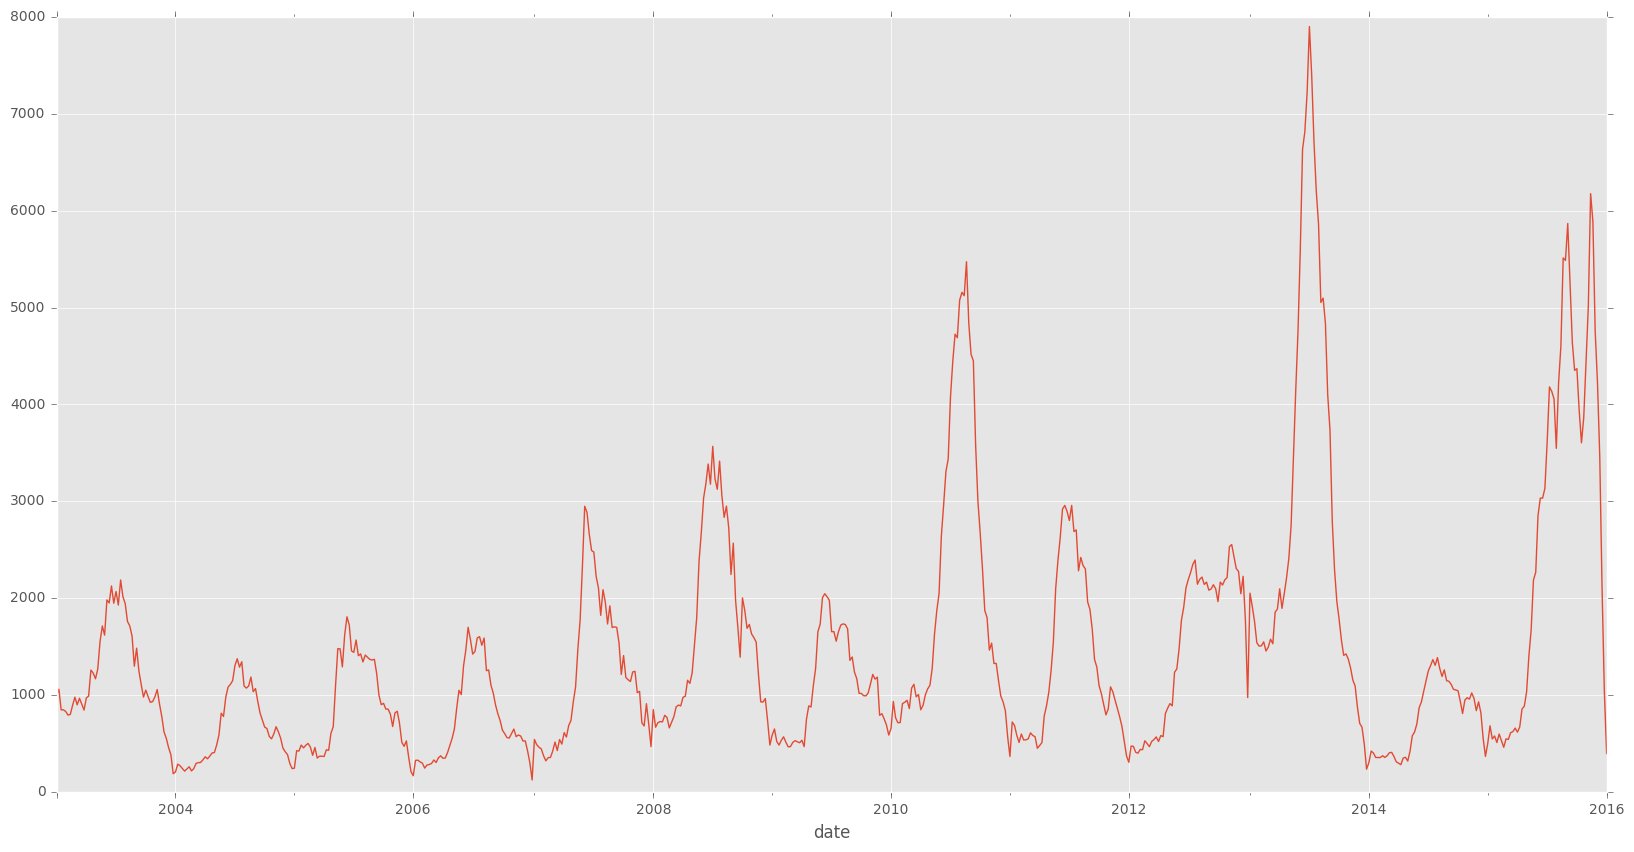

In [23]:
weekly_df = date_df.resample('W').size()
weekly_df.plot(kind='line',figsize=(20,10))

In [24]:
weekly_df = pd.DataFrame(weekly_df)
weekly_df.columns = ['cases']

In [25]:
weekly_df['date'] = weekly_df.index

In [26]:
weekly_df.date.min()

Timestamp('2003-01-05 00:00:00')

In [27]:
weekly_df["timeIndex"] = weekly_df.date - weekly_df.date.min()

In [28]:
weekly_df.head()

,cases,date,timeIndex
date,,,
2003-01-05,998,2003-01-05,0 days
2003-01-12,1060,2003-01-12,7 days
2003-01-19,847,2003-01-19,14 days
2003-01-26,848,2003-01-26,21 days
2003-02-02,830,2003-02-02,28 days


In [29]:
weekly_df['timeIndex'] = weekly_df['timeIndex']/np.timedelta64(1,'W')

In [30]:
weekly_df['timeIndex'] = weekly_df['timeIndex'].round(0).astype(int)

In [31]:
model_linear = smf.ols('cases ~ timeIndex', data = weekly_df).fit()

In [33]:
bkkCases = allProvinces_df[allProvinces_df['จังหวัด'] == "Bangkok"]
# allProvinces_df

In [34]:
bkkCases.head()

,โรค,รหัสจังหวัด,date,จังหวัด
397,26,10,2003-01-01,Bangkok
5543,26,10,2003-01-01,Bangkok
5434,26,10,2003-01-01,Bangkok
2502,26,10,2003-01-01,Bangkok
2446,27,10,2003-01-01,Bangkok


In [35]:
bkkCases = bkkCases.sort_values(by='date')
# bkkCases.index = pd.PeriodIndex(bkkCases.date, freq='M')

In [36]:
bkkCases['year'] = bkkCases['date'].astype('str').str[:4]

In [37]:
bkkCases['monthVal'] = pd.DatetimeIndex(bkkCases['date']).month

In [38]:
a = pd.DataFrame(bkkCases.groupby([bkkCases['year'],bkkCases['monthVal']]).size())


In [39]:
a.columns = ['bkk_freq']

In [40]:
yr = [i for i in range(3,15)]
mth = [i for i in range(1,13)]


In [41]:
yr_tmp = []
mth_tmp = []
freq_tmp = []
for idx, iele in enumerate(yr):
    for jdx, jele in enumerate(mth):
        yr_tmp.append(iele)
        mth_tmp.append(jele)

for i in a.bkk_freq:
    freq_tmp.append(i)

In [42]:
yr_tmp = np.array(yr_tmp)
mth_tmp = np.array(mth_tmp)
freq_tmp = np.array(freq_tmp)

In [43]:
bkk_df = pd.DataFrame(yr_tmp)
bkk_df['mth'] = pd.Series(mth_tmp)
bkk_df['freq'] = pd.Series(freq_tmp)
bkk_df.columns = ['yr','mth','freq']

In [44]:
bkk_pivot = pd.pivot_table(bkk_df, values = "freq", columns = "yr", index = "mth")

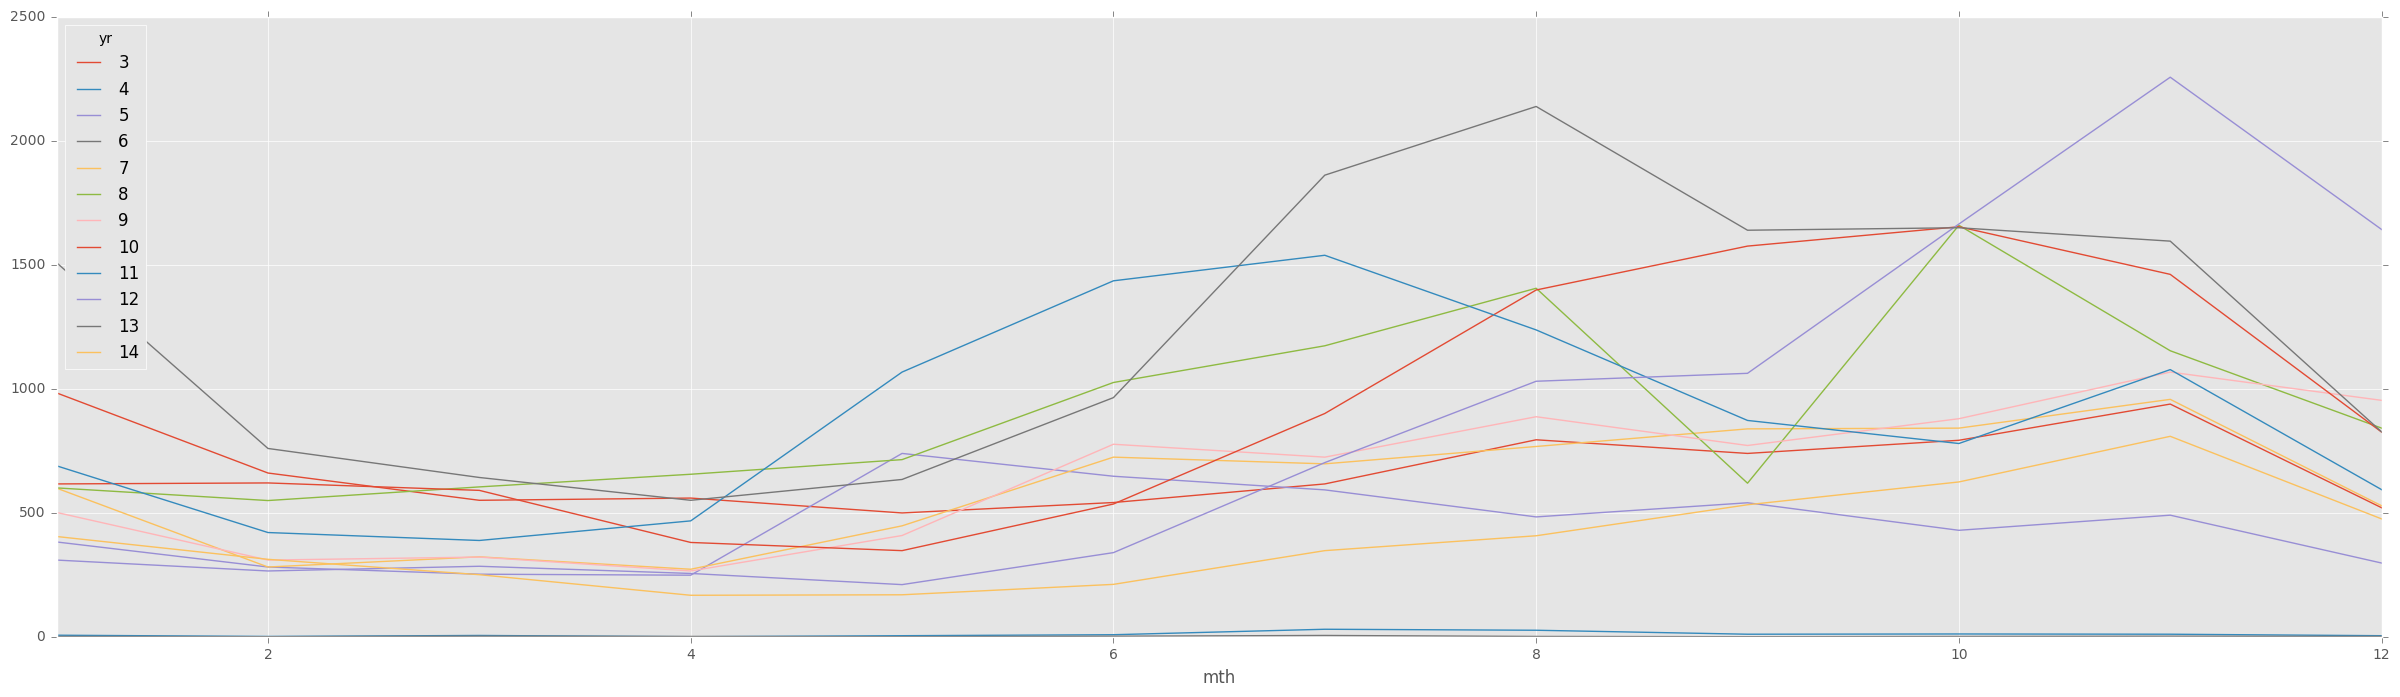

In [45]:
bkk_pivot.plot(figsize=(30,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x137237ad0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x170c2e810>]], dtype=object)

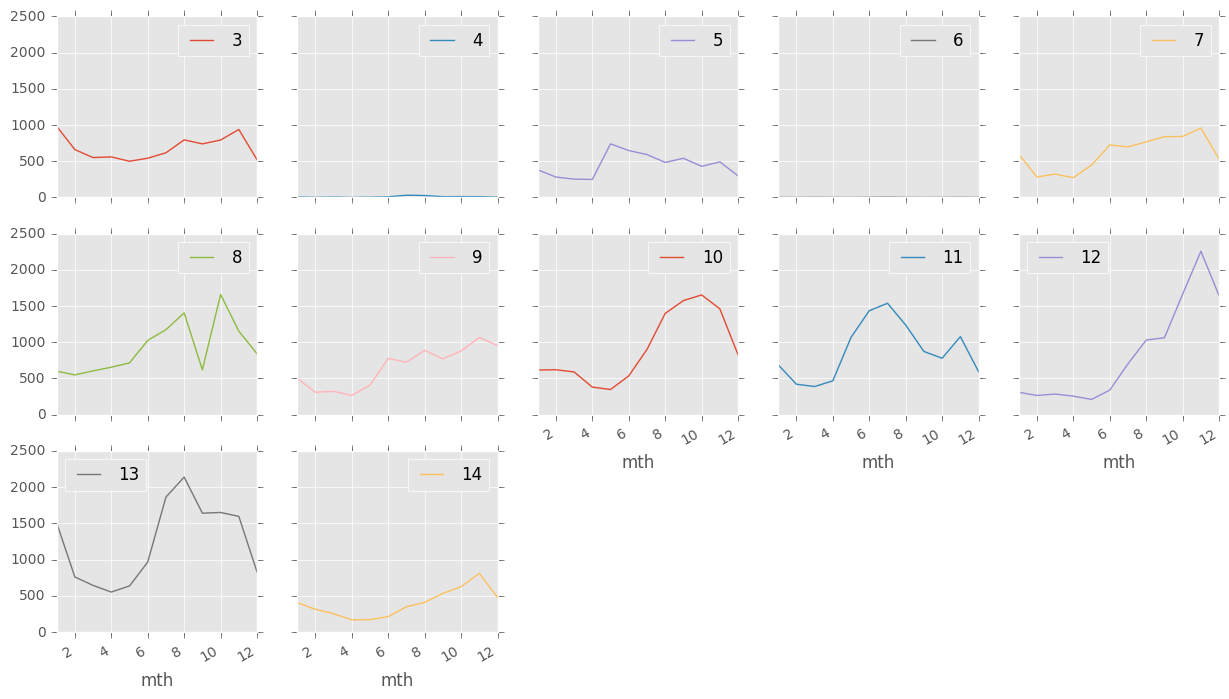

In [46]:
bkk_pivot.plot(subplots = True, figsize=(15, 15), layout=(5, 5), sharey=True)

In [47]:
def simple_seasonal_predictor(year):
    temp = []
    start = 12
#     previous = arr[119]
    n = (year * 12) + 1
    for i in range(n):
        predicted = bkk_df.iloc[start-12].freq + (bkk_df.iloc[start-1].freq - bkk_df.iloc[start-13].freq)
#         previous = predicted
        temp.append(predicted)
        start+=1
    
#     start_mth = datetime.datetime.strptime(start_from, "%Y-%m-%d")
#     date_list = [start_mth + relativedelta(months=x) for x in range(0,n)]
#     return date_list, temp
    return temp



In [48]:
freq = simple_seasonal_predictor(11)

In [49]:
freq = np.array(simple_seasonal_predictor(11))
nans = np.array([0 for i in range(11)])
freq = np.concatenate((nans,freq),axis=0)

bkk_df['prediction'] = pd.Series(freq)

In [50]:
start_mth = datetime.datetime.strptime("2003-01-01", "%Y-%m-%d")
date_list = [start_mth + relativedelta(months=x) for x in range(0,144)]
bkk_df['date'] = pd.Series(date_list)
bkk_df= bkk_df.set_index(bkk_df.date)

### To plot all provinces and its dengue

In [58]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
#     rolmean = pd.rolling_mean(timeseries, window=12)
#     rolstd = pd.rolling_std(timeseries, window=12)

#     #Plot rolling statistics:
#     fig = plt.figure(figsize=(30, 8))
#     orig = plt.plot(timeseries, color='blue',label='Original')
#     mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
#     plt.legend(loc='best')
#     plt.title('Rolling Mean & Standard Deviation')
#     plt.show()
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

In [56]:
# test_stationarity(bkk_df.freq)

In [59]:
test_stationarity(weekly_df.cases)

Results of Dickey-Fuller Test:
Test Statistic                  -5.263205
p-value                          0.000007
#Lags Used                      18.000000
Number of Observations Used    660.000000
Critical Value (5%)             -2.865929
Critical Value (1%)             -3.440297
Critical Value (10%)            -2.569107
dtype: float64


In [61]:
test_stationarity(bkk_df.freq)

Results of Dickey-Fuller Test:
Test Statistic                  -2.120023
p-value                          0.236540
#Lags Used                       7.000000
Number of Observations Used    136.000000
Critical Value (5%)             -2.883037
Critical Value (1%)             -3.479372
Critical Value (10%)            -2.578234
dtype: float64


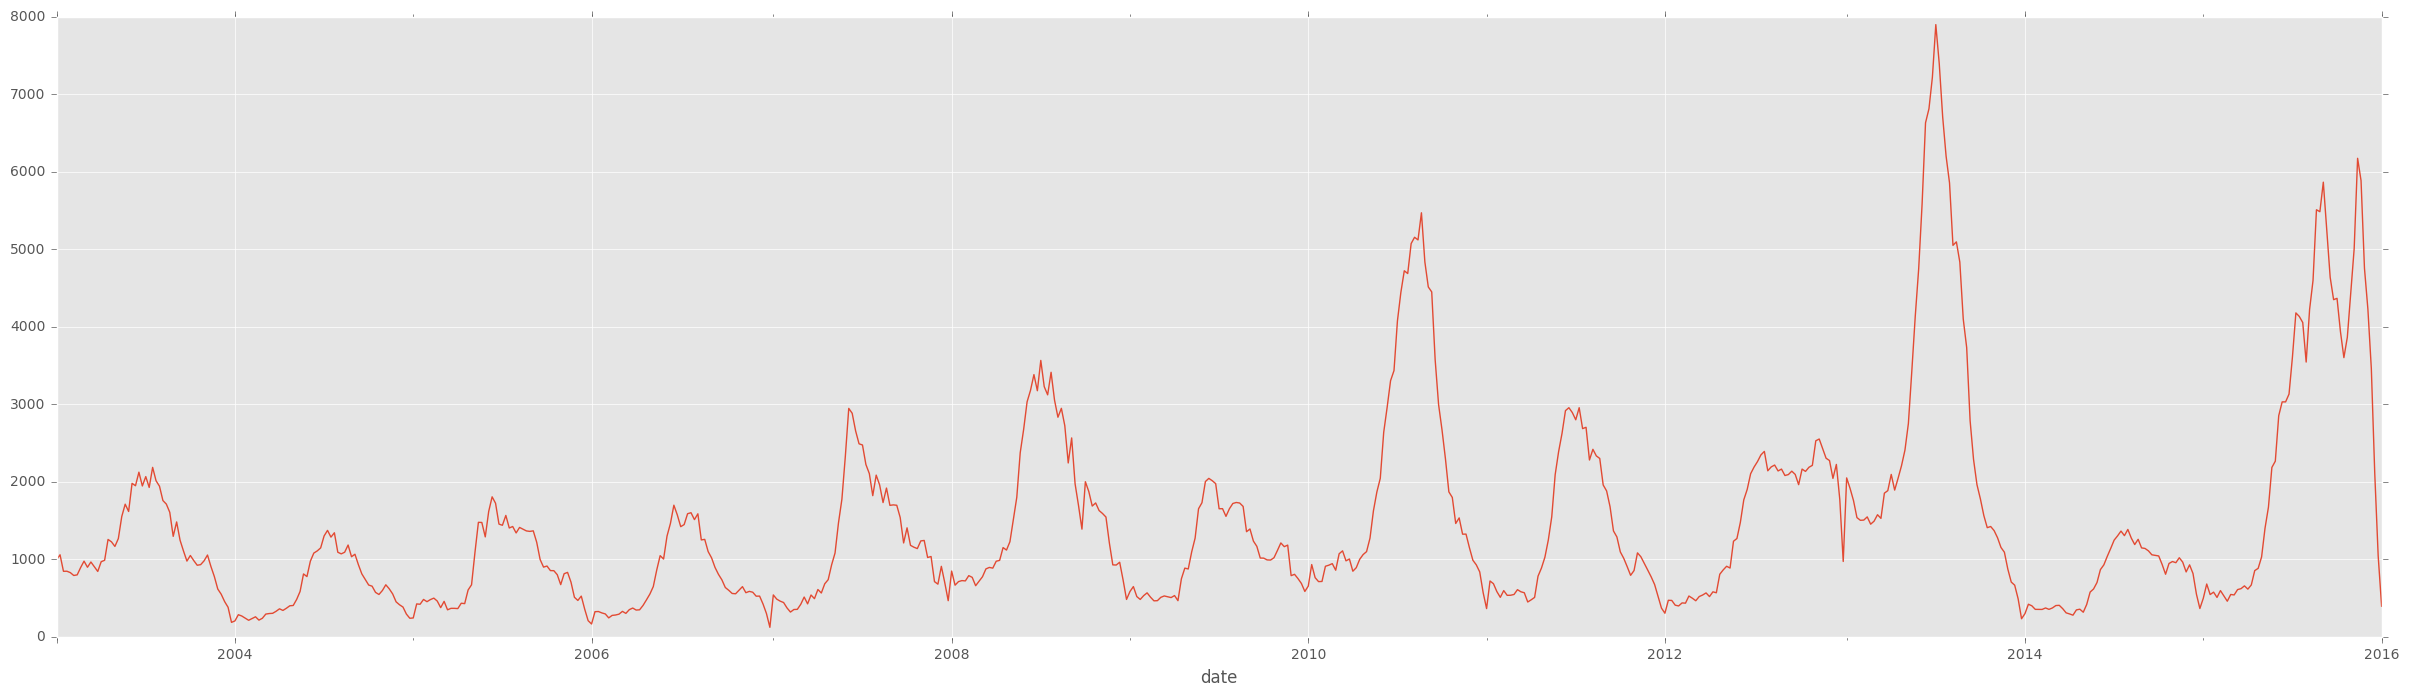

In [62]:
plt.figure(figsize=(30,8))
weekly_df.cases.plot()

## Autocorrelation Function

In [63]:
from statsmodels.tsa.stattools import acf, pacf

In [64]:
# lag_acf = acf(weekly_df.cases, nlags=52*2)
lag_acf = acf(weekly_df.cases, nlags=len(weekly_df.cases)/4)
# lag_pacf = pacf(weekly_df.cases, nlags=52*6, method='ols')

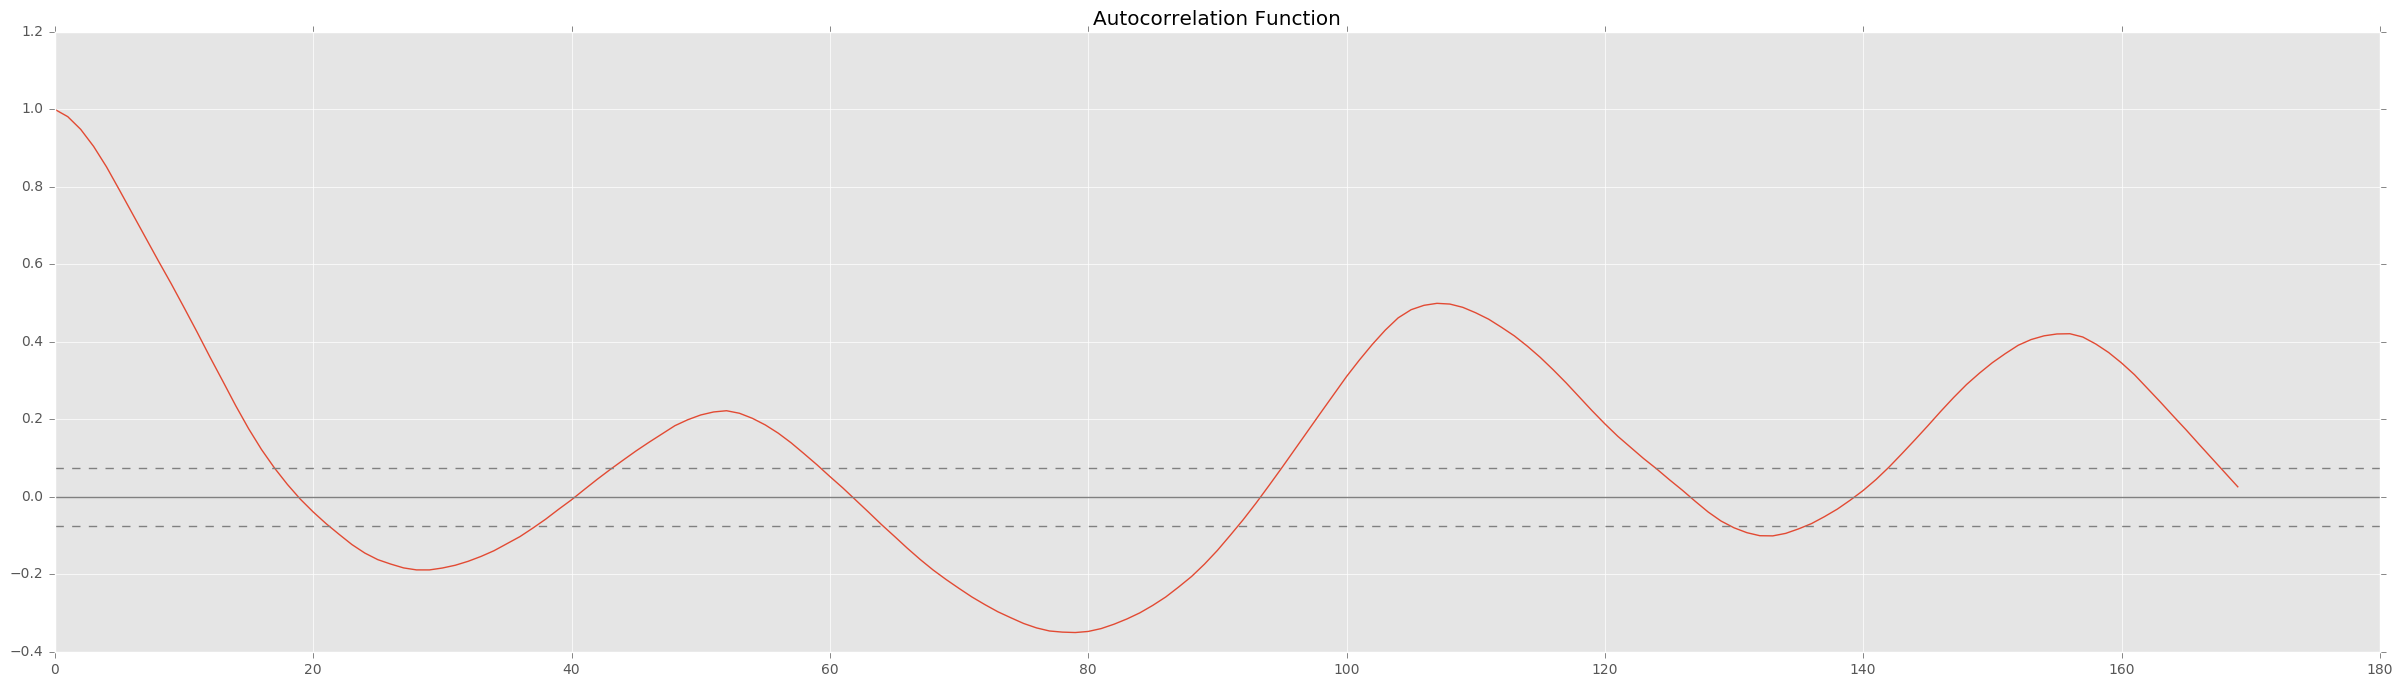

In [65]:
#Plot ACF: 
plt.figure(figsize=(30,8))
plt.plot(lag_acf)
plt.axhline(y=0,color='gray')
plt.axhline(y=-1.96/np.sqrt(len(weekly_df.cases)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(weekly_df.cases)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# plt.figure(figsize=(30,8))
# plt.plot(lag_pacf)
# plt.axhline(y=0,color='gray')
# plt.axhline(y=-1.96/np.sqrt(len(weekly_df.cases)),linestyle='--',color='gray')
# plt.axhline(y=1.96/np.sqrt(len(weekly_df.cases)),linestyle='--',color='gray')
# plt.title('Partial Autocorrelation Function')

In [66]:
temp = np.array(weekly_df.cases[:2])
temp_N = float(len(weekly_df.cases))
temp_mean = weekly_df.cases.sum() / temp_N

## using 10 weeks prior cases, predict the upcoming week
### only one set of alphas

In [ ]:
# # train alpha of only 1 year
# y_cases = weekly_df.cases[209:261]

# def guess(w,x):
#     res = w[0]
#     ws = w[1:]
#     N = len(x)-1
#     for i,ww in enumerate(ws):
#         res += ww*x[N-i]
#     return res
    
# def cost(w):  
#     return sum((y_cases[i+11] - guess(w,y_cases[i:i+10]))**2 \
#                for i in range(len(y_cases)-11))/len(y_cases)


In [67]:
weekly_df.head()

,cases,date,timeIndex
date,,,
2003-01-05,998,2003-01-05,0
2003-01-12,1060,2003-01-12,1
2003-01-19,847,2003-01-19,2
2003-01-26,848,2003-01-26,3
2003-02-02,830,2003-02-02,4


In [72]:
from scipy.optimize import fmin, minimize

def get_alphas(lag,train):
    
    np.random.seed(99)
    arr = np.random.randn(lag)
    
    def guess(w,x):
        res = w[0]
        ws = w[1:]
        N = len(x)-1
        for i,ww in enumerate(ws):
            res += ww*x[N-i]
        return res
    
    def cost(w):  
        return sum((train[i+lag] - guess(w,train[i:i+(lag-1)]))**2 \
               for i in range(len(train)-lag))/len(train)
    
    w = minimize(cost,arr).x
    return w
    
                #int,array,array,string
def make_line(start_week,real,predictions,title):
    plt.figure(figsize=(12,6))
    plt.plot([i for i in range(len(real))],np.array(real),'-r',label='Real')
    plt.plot([i for i in range(start_week,len(real)+1)],predictions,'-k',label='Prediction',alpha=0.4)
    plt.axvline(start_week)
    plt.legend()
    plt.title(title)
    
def guess(w,x):
    res = w[0]
    ws = w[1:]
    N = len(x)-1
    for i,ww in enumerate(ws):
        res += ww*x[N-i]
    return res

In [69]:
y_cases = weekly_df.cases[209:261]
w_11 = get_alphas(11,y_cases)

In [70]:
# if there's 1 in there and all other values are zeros,
# you are probably minizing your predicted value

w_11

array([  3.59030674e+02,   1.12519097e+00,   1.42229773e-01,
        -1.40693996e-01,  -3.86630795e-01,  -3.09382229e-02,
        -7.97363379e-02,   4.66017102e-02,   4.01299338e-01,
         1.10533321e-02,  -3.46629603e-01])

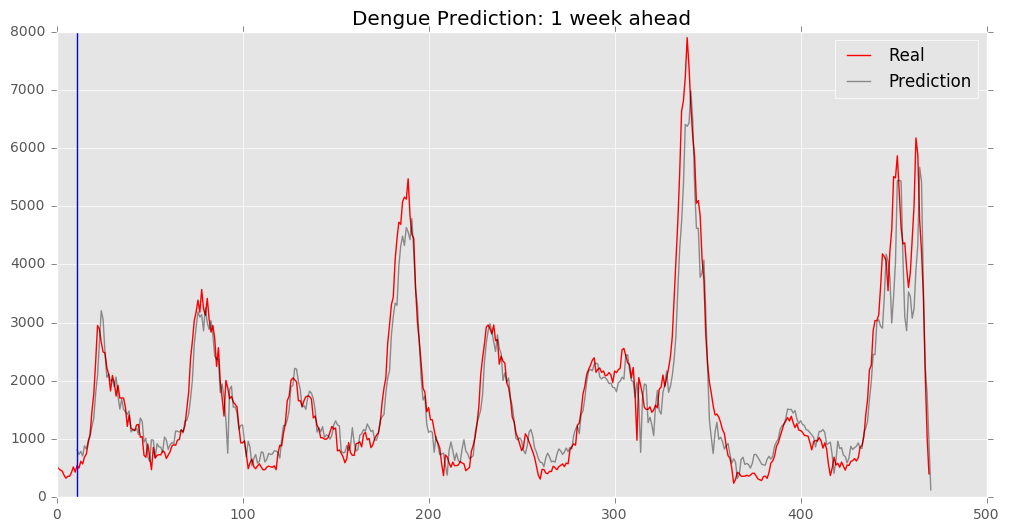

In [73]:
NWEEKS = 10
prediction_1week = []
# 2007 onward
test = weekly_df.cases[209:]
for i in range(len(test)-NWEEKS):
    res = guess(w_11,test[i:i+NWEEKS]) + np.log(63038247)
    prediction_1week.append(res)
    
make_line(11,test,prediction_1week,'Dengue Prediction: 1 week ahead')

## Predict n weeks to the future


### 2-week ahead prediction uses the previous prediction made 1 week ahead to predict the next week

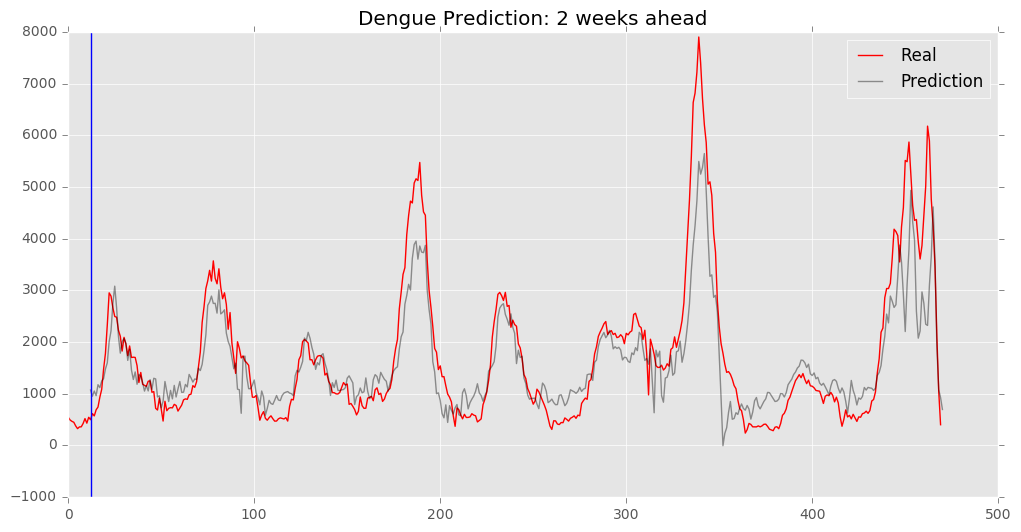

In [74]:
prediction_2week = []
test = weekly_df.cases[209:]
for i in range(len(test)-(NWEEKS+1)):
    first_prediction = guess(w_11,test[i:i+NWEEKS]) #+ np.log(63038247)
    # calculate res by using previous prediction
    arr = np.append(test[i+1:i+(NWEEKS+1)],first_prediction)
    res = guess(w_11,arr) + np.log(63038247)
    prediction_2week.append(res)
    
make_line(12,test,prediction_2week,'Dengue Prediction: 2 weeks ahead')

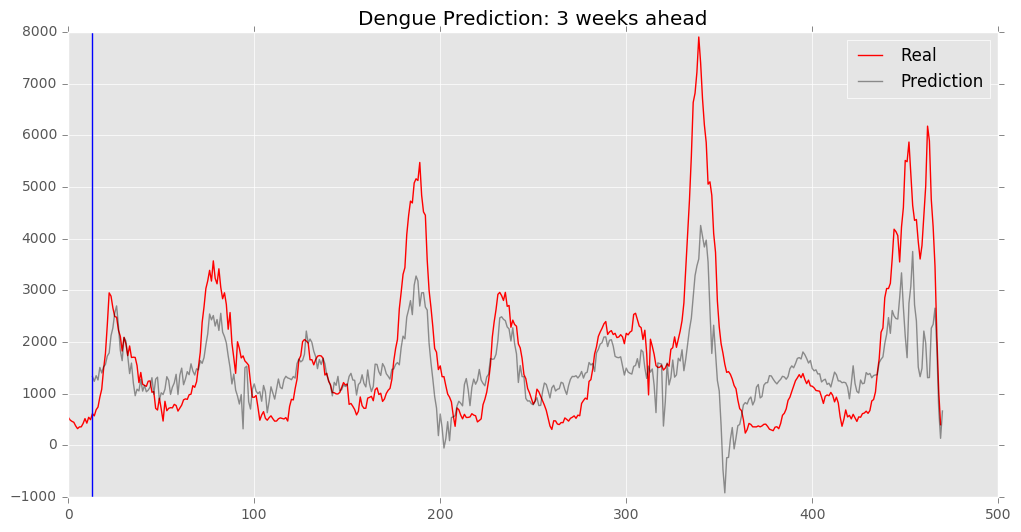

In [75]:
prediction_3week = []
test = weekly_df.cases[209:]
for i in range(len(test)-(NWEEKS+2)):
    first_prediction = guess(w_11,test[i:i+NWEEKS]) #+ np.log(63038247)
    first_arr = np.append(test[i+1:i+(NWEEKS+1)],first_prediction)
    second_prediction = guess(w_11,first_arr)
    second_arr = np.append(test[i+2:i+(NWEEKS+2)],second_prediction)
    res = guess(w_11,second_arr) + np.log(63038247)
    prediction_3week.append(res)

make_line(13,test,prediction_3week,'Dengue Prediction: 3 weeks ahead')

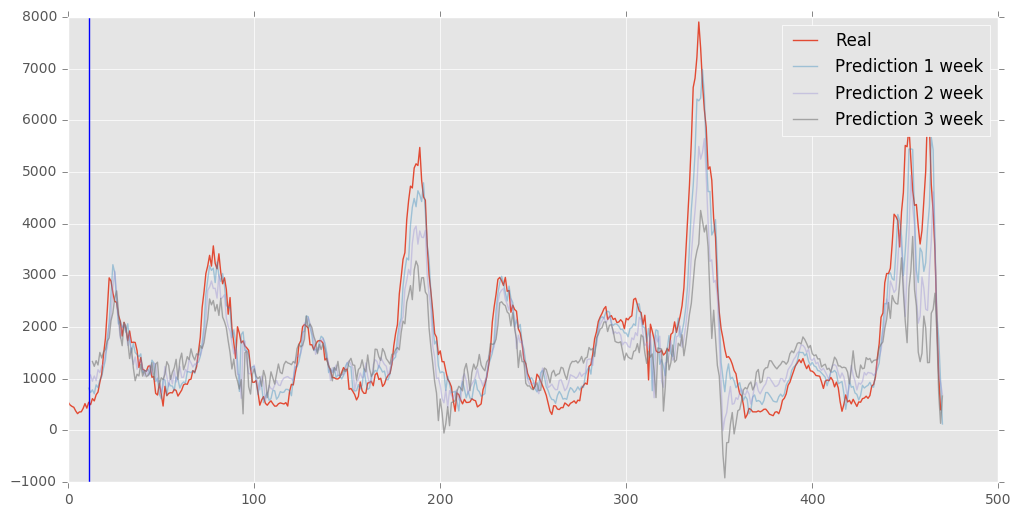

In [76]:
plt.figure(figsize=(12,6))
plt.plot([i for i in range(len(test))],np.array(test),label='Real')
plt.plot([i for i in range(11,len(test)+1)],prediction_1week,label='Prediction 1 week',alpha=0.4)
plt.plot([i for i in range(12,len(test)+1)],prediction_2week,label='Prediction 2 week',alpha=0.4)
plt.plot([i for i in range(13,len(test)+1)],prediction_3week,label='Prediction 3 week',alpha=0.6)
plt.axvline(11)
plt.legend()

In [77]:
# does temperature improve the previous line

In [78]:
# train every 1 year, see whether alpha changes 
# see alpha of every year and plot histogram

In [84]:
# y_cases_27 = 
w_27 = get_alphas(27,y_cases)

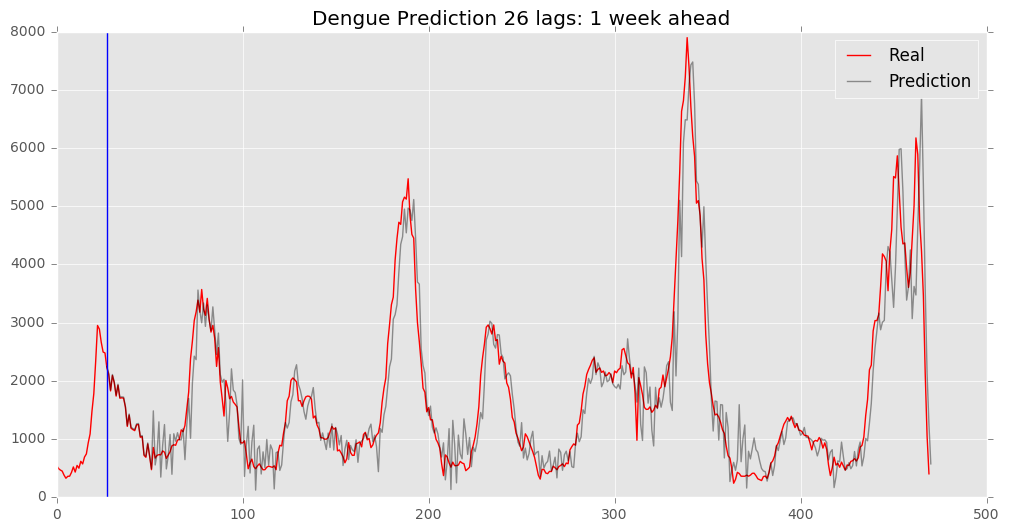

In [85]:
NWEEKS = 26
prediction_26alpha_1week = []
# 2007 onward
test = weekly_df.cases[209:]
for i in range(len(test)-NWEEKS):
    res = guess(w_27,test[i:i+NWEEKS]) + np.log(63038247)
    prediction_26alpha_1week.append(res)

make_line(27,test,prediction_26alpha_1week,'Dengue Prediction 26 lags: 1 week ahead')

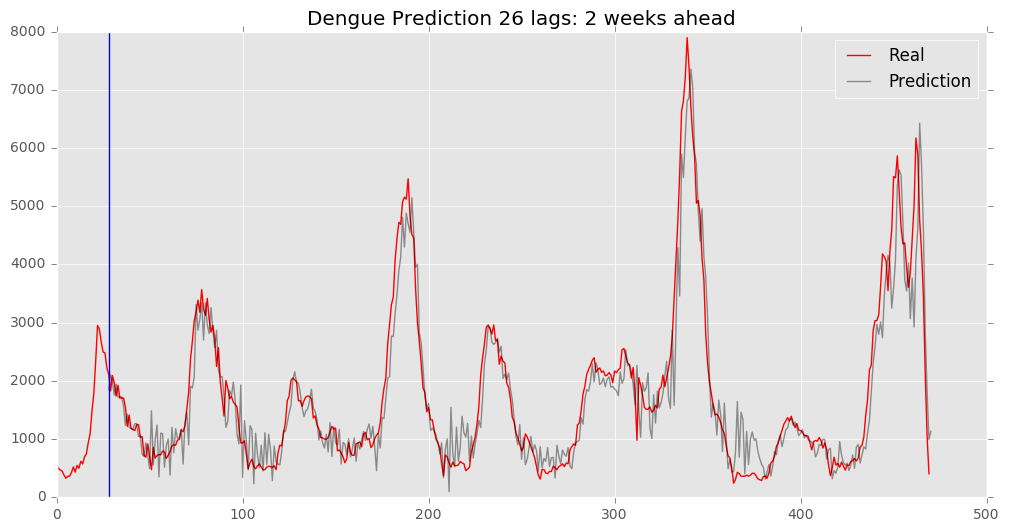

In [86]:
prediction_26alpha_2week = []
# 2007 onward
test = weekly_df.cases[209:]
for i in range(len(test)-(NWEEKS+1)):
    first_prediction = guess(w_27,test[i:i+NWEEKS])
    arr = np.append(test[i+1:i+(NWEEKS+1)],first_prediction)
    res = guess(w_27,arr) + np.log(63038247)
    prediction_26alpha_2week.append(res)
    
make_line(28,test,prediction_26alpha_2week,'Dengue Prediction 26 lags: 2 weeks ahead')

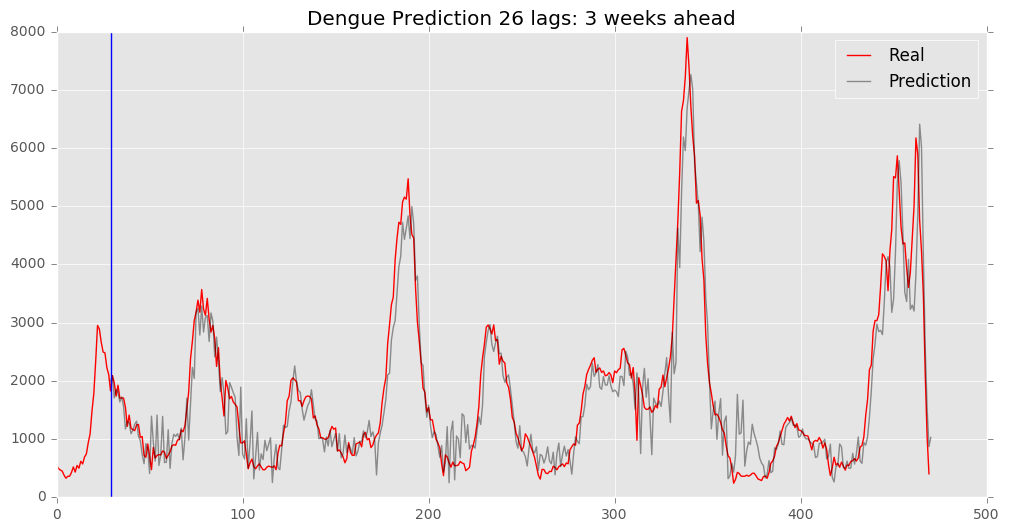

In [87]:
prediction_26alpha_3week = []
test = weekly_df.cases[209:]
for i in range(len(test)-(NWEEKS+2)):
    first_prediction = guess(w_27,test[i:i+NWEEKS]) #+ np.log(63038247)
    first_arr = np.append(test[i+1:i+(NWEEKS+1)],first_prediction)
    second_prediction = guess(w_27,first_arr)
    second_arr = np.append(test[i+2:i+(NWEEKS+2)],second_prediction)
    res = guess(w_27,second_arr) + np.log(63038247)
    prediction_26alpha_3week.append(res)
    
make_line(29,test,prediction_26alpha_3week,'Dengue Prediction 26 lags: 3 weeks ahead')

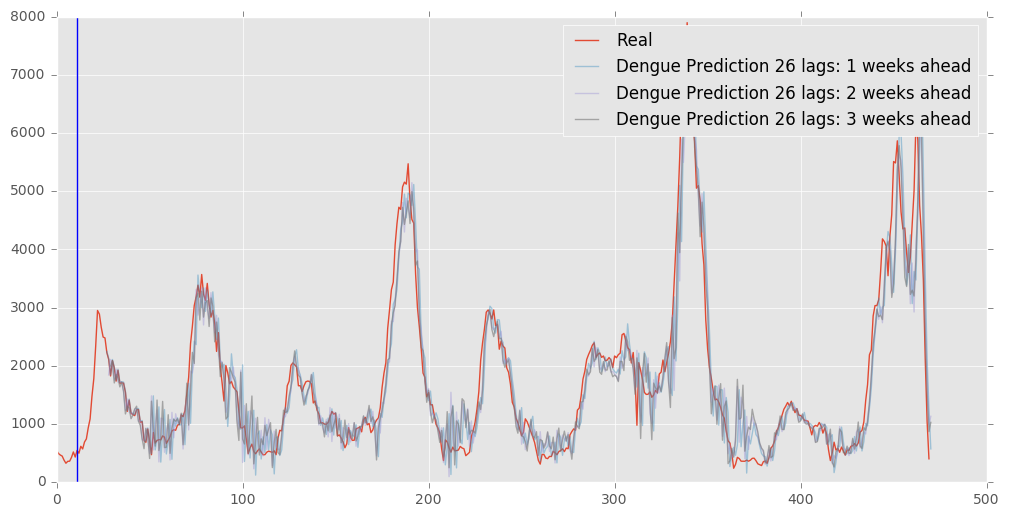

In [88]:
plt.figure(figsize=(12,6))
plt.plot([i for i in range(len(test))],np.array(test),label='Real')
plt.plot([i for i in range(27,len(test)+1)],prediction_26alpha_1week,label='Dengue Prediction 26 lags: 1 weeks ahead',alpha=0.4)
plt.plot([i for i in range(28,len(test)+1)],prediction_26alpha_2week,label='Dengue Prediction 26 lags: 2 weeks ahead',alpha=0.4)
plt.plot([i for i in range(29,len(test)+1)],prediction_26alpha_3week,label='Dengue Prediction 26 lags: 3 weeks ahead',alpha=0.6)
plt.axvline(11)
plt.legend()

### doesn't need to penalize the alphas or performing re since the current model isn't too complex

In [ ]:
# physical motivation